# Analysing the users from Google Store Website and predicting the total spent per user

## Google Store:https://shop.googlemerchandisestore.com/

## Google Analytics from Google Store: https://analytics.google.com/analytics/web/?utm_source=demoaccount&utm_medium=demoaccount&utm_campaign=demoaccount#/report-home/a54516992w87479473p92320289

## Database from Alura

# 1. Preparing the Data

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/digital-marketing-ml/master/train.csv')
df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,1,1472804607
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,1,1472835928
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,1,1472856802
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472879649,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472879649,2,1472879649
4,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472829671,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472829671,1,1472829671


In [2]:
df.shape

(12283, 12)

In [3]:
df.dtypes

channelGrouping         object
date                     int64
device                  object
fullVisitorId           uint64
geoNetwork              object
sessionId               object
socialEngagementType    object
totals                  object
trafficSource           object
visitId                  int64
visitNumber              int64
visitStartTime           int64
dtype: object

## Modifying the column types:
* Data (Convert to Object)
* fullVisitorId (Convert to Object)
* visitId (Convert to Object)

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/digital-marketing-ml/master/train.csv',
                  dtype = {'date' : object, 'fullVisitorId' : object, 'VisitId' : object})
df.dtypes

channelGrouping         object
date                    object
device                  object
fullVisitorId           object
geoNetwork              object
sessionId               object
socialEngagementType    object
totals                  object
trafficSource           object
visitId                  int64
visitNumber              int64
visitStartTime           int64
dtype: object

## Open the dictionaries and insert to 'df'

In [5]:
import json

# columns with dictionaries
dicts = ['device', 'geoNetwork', 'trafficSource', 'totals']

# add the data from dictionaries to 'df'
for column in dicts:
    df = df.join(pd.DataFrame([json.loads(row) for row in df[column]]))

df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,...,isTrueDirect,referralPath,adContent,campaignCode,visits,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472879649,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472879649,...,True,NaN,NaN,NaN,1,1,1,1,NaN,NaN
4,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472829671,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472829671,...,NaN,NaN,NaN,NaN,1,5,4,NaN,1,NaN


## Drop dictionary columns

In [6]:
df.drop(dicts, axis = 1, inplace = True)
df.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,browser,browserVersion,...,isTrueDirect,referralPath,adContent,campaignCode,visits,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,Not Socially Engaged,1472804607,1,1472804607,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,Not Socially Engaged,1472835928,1,1472835928,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,Not Socially Engaged,1472856802,1,1472856802,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,Not Socially Engaged,1472879649,2,1472879649,Safari,not available in demo dataset,...,True,NaN,NaN,NaN,1,1,1,1,NaN,NaN
4,Organic Search,20160902,1350700416054916432,1350700416054916432_1472829671,Not Socially Engaged,1472829671,1,1472829671,Safari,not available in demo dataset,...,NaN,NaN,NaN,NaN,1,5,4,NaN,1,NaN


## Drop 'adwordsClickInfo' column, because it doesn't bring any insight to the model.

In [7]:
df.drop('adwordsClickInfo', axis = 1, inplace = True)

## Verify the quantity of unique values in each column and drop the columns with 1 unique value

In [8]:
# list with columns names that contains just one unique value
column_na = []

# loop to identify the quantity of unique values per column
for column in df.columns:
    print(f'{column}: {len(df[column].unique())}')
    if len(df[column].unique()) == 1:
        column_na.append(column)
        
# drop the columns with 1 unique value
df.drop(column_na, axis = 1, inplace = True)

channelGrouping: 8
date: 366
fullVisitorId: 9997
sessionId: 12276
socialEngagementType: 1
visitId: 12272
visitNumber: 50
visitStartTime: 12279
browser: 22
browserVersion: 1
browserSize: 1
operatingSystem: 12
operatingSystemVersion: 1
isMobile: 2
mobileDeviceBranding: 1
mobileDeviceModel: 1
mobileInputSelector: 1
mobileDeviceInfo: 1
mobileDeviceMarketingName: 1
flashVersion: 1
language: 1
screenColors: 1
screenResolution: 1
deviceCategory: 3
continent: 6
subContinent: 22
country: 145
region: 212
metro: 53
city: 296
cityId: 1
networkDomain: 1747
latitude: 1
longitude: 1
networkLocation: 1
campaign: 7
source: 76
medium: 7
keyword: 129
isTrueDirect: 2
referralPath: 198
adContent: 16
campaignCode: 2
visits: 1
hits: 96
pageviews: 75
bounces: 2
newVisits: 2
transactionRevenue: 147


# 2. Feature Engineering: creating some variables

## 2.1 Understanding the variables

### Quantitative variables:
* newVisits (quantity of first visits)
* pageviews (quantity of pages that user saw per session)
* bounces (number of sessions that trigger only one request to the server, eg the person opens a page, then leaves the website) 
* hits (volume of interactions on the website)
* transactionRevenue

## 2.2 Correcting the quantitative variables

In [9]:
df.dtypes

channelGrouping       object
date                  object
fullVisitorId         object
sessionId             object
visitId                int64
visitNumber            int64
visitStartTime         int64
browser               object
operatingSystem       object
isMobile                bool
deviceCategory        object
continent             object
subContinent          object
country               object
region                object
metro                 object
city                  object
networkDomain         object
campaign              object
source                object
medium                object
keyword               object
isTrueDirect          object
referralPath          object
adContent             object
campaignCode          object
hits                  object
pageviews             object
bounces               object
newVisits             object
transactionRevenue    object
dtype: object

### List with quantitative vaiables 

In [10]:
quant = ['bounces', 'hits', 'newVisits', 'pageviews', 'transactionRevenue']

### Converting quantitative columns into numeric columns

In [11]:
for column in quant:
    df[column] = pd.to_numeric(df[column])

df.dtypes

channelGrouping        object
date                   object
fullVisitorId          object
sessionId              object
visitId                 int64
visitNumber             int64
visitStartTime          int64
browser                object
operatingSystem        object
isMobile                 bool
deviceCategory         object
continent              object
subContinent           object
country                object
region                 object
metro                  object
city                   object
networkDomain          object
campaign               object
source                 object
medium                 object
keyword                object
isTrueDirect           object
referralPath           object
adContent              object
campaignCode           object
hits                    int64
pageviews               int64
bounces               float64
newVisits             float64
transactionRevenue    float64
dtype: object

## 2.3 Treating the variable transactionRevenue

In [12]:
df.transactionRevenue.value_counts()

19190000.0     3
33590000.0     3
13590000.0     3
55990000.0     2
18990000.0     2
              ..
374850000.0    1
74850000.0     1
291070000.0    1
23960000.0     1
16780000.0     1
Name: transactionRevenue, Length: 146, dtype: int64

In [13]:
# null values
null = df.transactionRevenue.isna().sum()
null_percentage = null / df.shape[0] * 100

print(f'Percentage of null transactions = {null_percentage:.2f}%')

Percentage of null transactions = 98.66%


### Replace the nan values per 0

In [14]:
df.transactionRevenue.fillna(0, inplace = True)
df.transactionRevenue

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
12278    0.0
12279    0.0
12280    0.0
12281    0.0
12282    0.0
Name: transactionRevenue, Length: 12283, dtype: float64

### Divide the transactionRevenue column per 10^6, because initially the variable comes multiply by 10^6

In [15]:
df.transactionRevenue = df.transactionRevenue / pow(10, 6)
df.transactionRevenue.value_counts()

0.00      12119
19.19         3
13.59         3
33.59         3
27.19         2
          ...  
253.77        1
239.88        1
88.05         1
112.05        1
26.49         1
Name: transactionRevenue, Length: 147, dtype: int64

## 2.4 Creating Variables

### Count distinct fullVisitorId

In [16]:
len(set(df.fullVisitorId))

9997

### Grouping quantitative variables by 'fullVisitorId'

In [17]:
df_quant = df.groupby('fullVisitorId', as_index = False)[quant].sum()
df_quant.head()

,fullVisitorId,bounces,hits,newVisits,pageviews,transactionRevenue
0,0002365800130207040,1.0,1,1.0,1,0.0
1,0010286039787739137,0.0,4,1.0,3,0.0
2,0011056874471185769,0.0,2,1.0,2,0.0
3,0014443856125569702,1.0,1,1.0,1,0.0
4,0017260116665815114,0.0,2,0.0,2,0.0


In [18]:
df_quant.shape

(9997, 6)

# 3. Training the Model

## 3.1 Train and test datasets

### Splitting the features from target variable.

In [19]:
y = df_quant.transactionRevenue.copy()
X = df_quant.drop('transactionRevenue', axis = 1)

### Splitting the dataset into train set and test set

In [20]:
from sklearn.model_selection import train_test_split

# random variable
SEED = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                    random_state = SEED)

## 3.2 Training a linear regression

In [21]:
from sklearn.linear_model import LinearRegression

# Create the model
reg = LinearRegression()

# train the model
reg.fit(X_train, y_train)

# predict
reg_predict = reg.predict(X_test)

## 3.3 Evaluate the results

In [22]:
results = pd.DataFrame()

results['revenue'] = y_test
results['predict'] = reg_predict
results['error'] = reg_predict - y_test
results.head()

,revenue,predict,error
4122,0.0,1.551660,1.551660
4065,0.0,1.555209,1.555209
1731,0.0,1.687726,1.687726
4740,0.0,1.515492,1.515492
6391,0.0,1.422655,1.422655


### Analysing the errors with revenue > 0

In [23]:
results[results['revenue'] > 0].head()

,revenue,predict,error
3006,32.49,1.616211,-30.873789
5928,74.85,1.449755,-73.400245
8361,424.50,1.306194,-423.193806
8612,55.99,1.291322,-54.698678
416,15.19,1.831725,-13.358275


### Mean squared error (MSE) and root mean squared error (RMSE)

In [24]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, reg_predict)
print(f'MSE = {mse:.2f}')

rmse = np.sqrt(mse)
print(f'RMSE = {rmse:.2f}')

MSE = 807.25
RMSE = 28.41


### Analysing the mean and standard deviation

In [25]:
mean = np.mean(df_quant.transactionRevenue)
print(f'Mean = {mean:.2f}')

std = np.std(df_quant.transactionRevenue)
print(f'Standard deviation = {std:.2f}')

Mean = 1.78
Standard deviation = 25.13


Conclusions:
- The model present a higher RMSE (28,41) than the standard deviation (25,13)
- The model is predicting wrong values for people that spent and for those that don't spent

## 3.4 Graphical analysis of results

### Plot the predictions

Text(0.5, 1.0, 'Linear Regression predicting transactionRevenue')

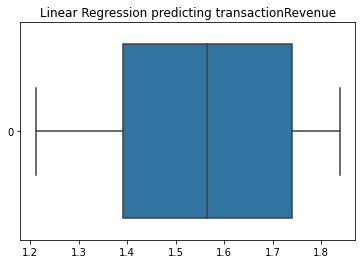

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data = reg_predict, orient = 'h')
plt.title('Linear Regression predicting transactionRevenue')

In [27]:
results[['predict']].describe()

,predict
count,3000.000000
mean,1.557842
std,0.192413
min,1.211196
25%,1.390979
50%,1.564708
75%,1.739184
max,1.839299


### Plot y_test (true values)

Text(0.5, 1.0, 'y_test transactionRevenue')

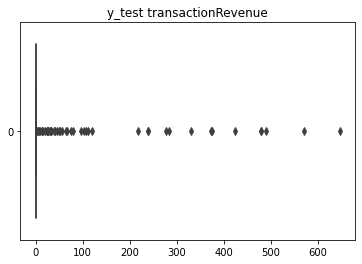

In [28]:
sns.boxplot(data = y_test, orient = 'h')
plt.title('y_test transactionRevenue')

### Plot the error

Text(0.5, 1.0, 'Error transactionRevenue')

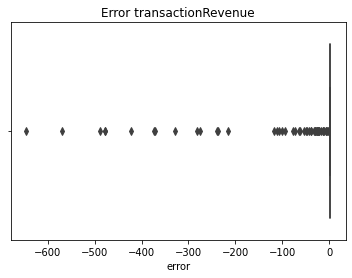

In [29]:
sns.boxplot(data = results, x = 'error')
plt.title('Error transactionRevenue')

Conclusions:
- predominance of error close to 0
- the model need adjustments

# 4.Improving the feature engineering

## 4.1 Creating qualitative variables

### Create columns from the first and the last visits

In [30]:
first_visits = df.sort_values(by = ['fullVisitorId', 'visitNumber'], ascending = True)\
                 .drop_duplicates(subset = 'fullVisitorId', keep = 'first')

last_visits = df.sort_values(by = ['fullVisitorId', 'visitNumber'], ascending = False)\
                .drop_duplicates(subset = 'fullVisitorId', keep = 'first')

visits = pd.merge(first_visits, last_visits,
                  left_on = ['fullVisitorId'],
                  right_on = ['fullVisitorId'],
                  how = 'inner',
                  suffixes = ['_first', '_last'])
visits

,channelGrouping_first,date_first,fullVisitorId,sessionId_first,visitId_first,visitNumber_first,visitStartTime_first,browser_first,operatingSystem_first,isMobile_first,...,keyword_last,isTrueDirect_last,referralPath_last,adContent_last,campaignCode_last,hits_last,pageviews_last,bounces_last,newVisits_last,transactionRevenue_last
0,Social,20160904,0002365800130207040,0002365800130207040_1472974804,1472974804,1,1472974804,Edge,Windows,False,...,NaN,NaN,/yt/about/ru/,NaN,NaN,1,1,1.0,1.0,0.0
1,Organic Search,20160928,0010286039787739137,0010286039787739137_1475084026,1475084026,1,1475084026,Chrome,Chrome OS,False,...,(not provided),NaN,NaN,NaN,NaN,4,3,NaN,1.0,0.0
2,Social,20161205,0011056874471185769,0011056874471185769_1480996024,1480996024,1,1480996024,Chrome,Windows,False,...,NaN,NaN,/yt/about/,NaN,NaN,2,2,NaN,1.0,0.0
3,Social,20161002,0014443856125569702,0014443856125569702_1475423502,1475423502,1,1475423502,Opera,Windows,False,...,NaN,NaN,/yt/about/ro/,NaN,NaN,1,1,1.0,1.0,0.0
4,Direct,20170420,0017260116665815114,0017260116665815114_1492707286,1492707286,6,1492707286,Safari,Macintosh,False,...,NaN,True,NaN,NaN,NaN,2,2,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,Referral,20161221,9996691020299725061,9996691020299725061_1482388264,1482388264,3,1482388264,Chrome,Macintosh,False,...,NaN,True,/,NaN,NaN,10,10,NaN,NaN,0.0
9993,Social,20161130,9996793353803109760,9996793353803109760_1480566609,1480566609,1,1480566609,Chrome,Android,True,...,NaN,NaN,/yt/about/th/,NaN,NaN,1,1,1.0,1.0,0.0
9994,Organic Search,20170112,9997125062030599880,9997125062030599880_1484217422,1484217422,1,1484217422,Safari,iOS,True,...,(not provided),NaN,NaN,NaN,NaN,8,8,NaN,1.0,0.0
9995,Organic Search,20170314,9997464307347866920,9997464307347866920_1489504370,1489504370,1,1489504370,Chrome,Android,True,...,(not provided),NaN,NaN,NaN,NaN,1,1,1.0,1.0,0.0


## 4.2 Cleaning the dataset

In [31]:
quant

['bounces', 'hits', 'newVisits', 'pageviews', 'transactionRevenue']

### Loop for dropping quantitative columns from 'visits', because we already now how how to treat them.

In [32]:
for column in quant:
    visits.drop(column + '_first', axis = 1, inplace = True)
    visits.drop(column + '_last', axis = 1, inplace = True)
    
visits.head()

,channelGrouping_first,date_first,fullVisitorId,sessionId_first,visitId_first,visitNumber_first,visitStartTime_first,browser_first,operatingSystem_first,isMobile_first,...,city_last,networkDomain_last,campaign_last,source_last,medium_last,keyword_last,isTrueDirect_last,referralPath_last,adContent_last,campaignCode_last
0,Social,20160904,0002365800130207040,0002365800130207040_1472974804,1472974804,1,1472974804,Edge,Windows,False,...,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN
1,Organic Search,20160928,0010286039787739137,0010286039787739137_1475084026,1475084026,1,1475084026,Chrome,Chrome OS,False,...,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
2,Social,20161205,0011056874471185769,0011056874471185769_1480996024,1480996024,1,1480996024,Chrome,Windows,False,...,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN
3,Social,20161002,0014443856125569702,0014443856125569702_1475423502,1475423502,1,1475423502,Opera,Windows,False,...,Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN
4,Direct,20170420,0017260116665815114,0017260116665815114_1492707286,1492707286,6,1492707286,Safari,Macintosh,False,...,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN


### Drop the Id columns, because it doesn't bring useful insights to the model.

In [33]:
ids = ['sessionId_last', 'visitId_last',
       'sessionId_first', 'visitId_first']

for column in ids:
    visits.drop(column, axis=1, inplace = True)

visits.head()

,channelGrouping_first,date_first,fullVisitorId,visitNumber_first,visitStartTime_first,browser_first,operatingSystem_first,isMobile_first,deviceCategory_first,continent_first,...,city_last,networkDomain_last,campaign_last,source_last,medium_last,keyword_last,isTrueDirect_last,referralPath_last,adContent_last,campaignCode_last
0,Social,20160904,0002365800130207040,1,1472974804,Edge,Windows,False,desktop,Europe,...,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN
1,Organic Search,20160928,0010286039787739137,1,1475084026,Chrome,Chrome OS,False,desktop,Americas,...,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
2,Social,20161205,0011056874471185769,1,1480996024,Chrome,Windows,False,desktop,Asia,...,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN
3,Social,20161002,0014443856125569702,1,1475423502,Opera,Windows,False,desktop,Europe,...,Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN
4,Direct,20170420,0017260116665815114,6,1492707286,Safari,Macintosh,False,desktop,Americas,...,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN


### Drop location columns from the first visits, because hardly ever a user changes his location between first and last visit.

In [34]:
geo = ['continent_first', 'subContinent_first',
      'country_first', 'region_first',
      'metro_first', 'city_first',
      'networkDomain_first']

visits.drop(geo, axis = 1, inplace = True)
visits.head()

,channelGrouping_first,date_first,fullVisitorId,visitNumber_first,visitStartTime_first,browser_first,operatingSystem_first,isMobile_first,deviceCategory_first,campaign_first,...,city_last,networkDomain_last,campaign_last,source_last,medium_last,keyword_last,isTrueDirect_last,referralPath_last,adContent_last,campaignCode_last
0,Social,20160904,0002365800130207040,1,1472974804,Edge,Windows,False,desktop,(not set),...,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN
1,Organic Search,20160928,0010286039787739137,1,1475084026,Chrome,Chrome OS,False,desktop,(not set),...,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
2,Social,20161205,0011056874471185769,1,1480996024,Chrome,Windows,False,desktop,(not set),...,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN
3,Social,20161002,0014443856125569702,1,1475423502,Opera,Windows,False,desktop,(not set),...,Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN
4,Direct,20170420,0017260116665815114,6,1492707286,Safari,Macintosh,False,desktop,(not set),...,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN


## 4.5 Creating some variables

In [35]:
df_quant.head()

,fullVisitorId,bounces,hits,newVisits,pageviews,transactionRevenue
0,0002365800130207040,1.0,1,1.0,1,0.0
1,0010286039787739137,0.0,4,1.0,3,0.0
2,0011056874471185769,0.0,2,1.0,2,0.0
3,0014443856125569702,1.0,1,1.0,1,0.0
4,0017260116665815114,0.0,2,0.0,2,0.0


### Merge the quantitative dataframe 'df_quant' with the qualitative dataframe 'visits'

In [36]:
visits = pd.merge(visits,
                 df_quant,
                 left_on = ['fullVisitorId'],
                 right_on = ['fullVisitorId'],
                 how = 'left')
visits.head()

,channelGrouping_first,date_first,fullVisitorId,visitNumber_first,visitStartTime_first,browser_first,operatingSystem_first,isMobile_first,deviceCategory_first,campaign_first,...,keyword_last,isTrueDirect_last,referralPath_last,adContent_last,campaignCode_last,bounces,hits,newVisits,pageviews,transactionRevenue
0,Social,20160904,0002365800130207040,1,1472974804,Edge,Windows,False,desktop,(not set),...,NaN,NaN,/yt/about/ru/,NaN,NaN,1.0,1,1.0,1,0.0
1,Organic Search,20160928,0010286039787739137,1,1475084026,Chrome,Chrome OS,False,desktop,(not set),...,(not provided),NaN,NaN,NaN,NaN,0.0,4,1.0,3,0.0
2,Social,20161205,0011056874471185769,1,1480996024,Chrome,Windows,False,desktop,(not set),...,NaN,NaN,/yt/about/,NaN,NaN,0.0,2,1.0,2,0.0
3,Social,20161002,0014443856125569702,1,1475423502,Opera,Windows,False,desktop,(not set),...,NaN,NaN,/yt/about/ro/,NaN,NaN,1.0,1,1.0,1,0.0
4,Direct,20170420,0017260116665815114,6,1492707286,Safari,Macintosh,False,desktop,(not set),...,NaN,True,NaN,NaN,NaN,0.0,2,0.0,2,0.0


### Create the column 'dif_time', to verify the difference between the time access

In [37]:
visits['dif_time'] = visits.visitStartTime_last - visits.visitStartTime_first
visits.head()

,channelGrouping_first,date_first,fullVisitorId,visitNumber_first,visitStartTime_first,browser_first,operatingSystem_first,isMobile_first,deviceCategory_first,campaign_first,...,isTrueDirect_last,referralPath_last,adContent_last,campaignCode_last,bounces,hits,newVisits,pageviews,transactionRevenue,dif_time
0,Social,20160904,0002365800130207040,1,1472974804,Edge,Windows,False,desktop,(not set),...,NaN,/yt/about/ru/,NaN,NaN,1.0,1,1.0,1,0.0,0
1,Organic Search,20160928,0010286039787739137,1,1475084026,Chrome,Chrome OS,False,desktop,(not set),...,NaN,NaN,NaN,NaN,0.0,4,1.0,3,0.0,0
2,Social,20161205,0011056874471185769,1,1480996024,Chrome,Windows,False,desktop,(not set),...,NaN,/yt/about/,NaN,NaN,0.0,2,1.0,2,0.0,0
3,Social,20161002,0014443856125569702,1,1475423502,Opera,Windows,False,desktop,(not set),...,NaN,/yt/about/ro/,NaN,NaN,1.0,1,1.0,1,0.0,0
4,Direct,20170420,0017260116665815114,6,1492707286,Safari,Macintosh,False,desktop,(not set),...,True,NaN,NaN,NaN,0.0,2,0.0,2,0.0,0


### Create the column 'q_visits', to account the quantity of visits per user.

In [38]:
# create the dataframe 'q_visits'
q_visits = df[['fullVisitorId', 'visitId']].groupby('fullVisitorId', as_index = False).count()

# rename 'visitId' column
q_visits.rename(mapper = {'visitId' : 'q_visits'}, axis = 1, inplace = True)

# append 'q_visits' column in 'visits' dataframe
visits = pd.merge(visits,
                  q_visits,
                  left_on = ['fullVisitorId'],
                  right_on = ['fullVisitorId'],
                  how = 'left')
visits.head()

,channelGrouping_first,date_first,fullVisitorId,visitNumber_first,visitStartTime_first,browser_first,operatingSystem_first,isMobile_first,deviceCategory_first,campaign_first,...,referralPath_last,adContent_last,campaignCode_last,bounces,hits,newVisits,pageviews,transactionRevenue,dif_time,q_visits
0,Social,20160904,0002365800130207040,1,1472974804,Edge,Windows,False,desktop,(not set),...,/yt/about/ru/,NaN,NaN,1.0,1,1.0,1,0.0,0,1
1,Organic Search,20160928,0010286039787739137,1,1475084026,Chrome,Chrome OS,False,desktop,(not set),...,NaN,NaN,NaN,0.0,4,1.0,3,0.0,0,1
2,Social,20161205,0011056874471185769,1,1480996024,Chrome,Windows,False,desktop,(not set),...,/yt/about/,NaN,NaN,0.0,2,1.0,2,0.0,0,1
3,Social,20161002,0014443856125569702,1,1475423502,Opera,Windows,False,desktop,(not set),...,/yt/about/ro/,NaN,NaN,1.0,1,1.0,1,0.0,0,1
4,Direct,20170420,0017260116665815114,6,1492707286,Safari,Macintosh,False,desktop,(not set),...,NaN,NaN,NaN,0.0,2,0.0,2,0.0,0,1


### Create the columns: year, month, day; based on the dates from the first and last visit

In [39]:
# append columns from the first visits
visits[['year_first', 'month_first', 'day_first']] = [[int(date[0:4]), int(date[4:6]), int(date[6:8])]
                                                      for date in visits.date_first]


# append columns from the last visits
visits[['year_last', 'month_last', 'day_last']] = [[int(date[0:4]), int(date[4:6]), int(date[6:8])]
                                                      for date in visits.date_last]

visits.head()

,channelGrouping_first,date_first,fullVisitorId,visitNumber_first,visitStartTime_first,browser_first,operatingSystem_first,isMobile_first,deviceCategory_first,campaign_first,...,pageviews,transactionRevenue,dif_time,q_visits,year_first,month_first,day_first,year_last,month_last,day_last
0,Social,20160904,0002365800130207040,1,1472974804,Edge,Windows,False,desktop,(not set),...,1,0.0,0,1,2016,9,4,2016,9,4
1,Organic Search,20160928,0010286039787739137,1,1475084026,Chrome,Chrome OS,False,desktop,(not set),...,3,0.0,0,1,2016,9,28,2016,9,28
2,Social,20161205,0011056874471185769,1,1480996024,Chrome,Windows,False,desktop,(not set),...,2,0.0,0,1,2016,12,5,2016,12,5
3,Social,20161002,0014443856125569702,1,1475423502,Opera,Windows,False,desktop,(not set),...,1,0.0,0,1,2016,10,2,2016,10,2
4,Direct,20170420,0017260116665815114,6,1492707286,Safari,Macintosh,False,desktop,(not set),...,2,0.0,0,1,2017,4,20,2017,4,20


# 5. Training new models

## 5.1 Identifying the column types

In [40]:
visits.dtypes

channelGrouping_first     object
date_first                object
fullVisitorId             object
visitNumber_first          int64
visitStartTime_first       int64
browser_first             object
operatingSystem_first     object
isMobile_first              bool
deviceCategory_first      object
campaign_first            object
source_first              object
medium_first              object
keyword_first             object
isTrueDirect_first        object
referralPath_first        object
adContent_first           object
campaignCode_first        object
channelGrouping_last      object
date_last                 object
visitNumber_last           int64
visitStartTime_last        int64
browser_last              object
operatingSystem_last      object
isMobile_last               bool
deviceCategory_last       object
continent_last            object
subContinent_last         object
country_last              object
region_last               object
metro_last                object
city_last 

### Drop 'fullVisitorId' column

In [41]:
visits.drop('fullVisitorId', axis = 1, inplace = True)

### Splitting the features from target variable.

In [82]:
y = visits.transactionRevenue.copy()
X = visits.drop('transactionRevenue', axis = 1)

### List of qualitative variables

In [83]:
quali = visits.dtypes[visits.dtypes == object].keys()
quali

Index(['channelGrouping_first', 'date_first', 'browser_first',
       'operatingSystem_first', 'deviceCategory_first', 'campaign_first',
       'source_first', 'medium_first', 'keyword_first', 'isTrueDirect_first',
       'referralPath_first', 'adContent_first', 'campaignCode_first',
       'channelGrouping_last', 'date_last', 'browser_last',
       'operatingSystem_last', 'deviceCategory_last', 'continent_last',
       'subContinent_last', 'country_last', 'region_last', 'metro_last',
       'city_last', 'networkDomain_last', 'campaign_last', 'source_last',
       'medium_last', 'keyword_last', 'isTrueDirect_last', 'referralPath_last',
       'adContent_last', 'campaignCode_last'],
      dtype='object')

## 5.2 Label Encoder

### Looping to convert qualitative variables in quantitative variables.

In [84]:
from sklearn.preprocessing import LabelEncoder

for column in quali:
    # Convert the column to string
    string = list(X[column].values.astype('str'))
    
    # Create the encoder
    lbl = LabelEncoder()
    
    # Train the encoder
    lbl.fit(string)
    
    # Apply the encoder in the column
    X[column] = lbl.transform(string)
    
X.head()

,channelGrouping_first,date_first,visitNumber_first,visitStartTime_first,browser_first,operatingSystem_first,isMobile_first,deviceCategory_first,campaign_first,source_first,...,newVisits,pageviews,dif_time,q_visits,year_first,month_first,day_first,year_last,month_last,day_last
0,7,34,1,1472974804,7,9,False,0,0,72,...,1.0,1,0,1,2016,9,4,2016,9,4
1,4,58,1,1475084026,5,3,False,0,0,20,...,1.0,3,0,1,2016,9,28,2016,9,28
2,7,126,1,1480996024,5,9,False,0,0,72,...,1.0,2,0,1,2016,12,5,2016,12,5
3,7,62,1,1475423502,15,9,False,0,0,72,...,1.0,1,0,1,2016,10,2,2016,10,2
4,2,262,6,1492707286,18,6,False,0,0,0,...,0.0,2,0,1,2017,4,20,2017,4,20


## 5.3 Training a Linear Regression model

### Splitting the dataset into train set and test set

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = SEED)

### Create the model

In [86]:
from sklearn.linear_model import LinearRegression

# Create the model
reg = LinearRegression()

# Train the model
reg.fit(X_train, y_train)

# Predict
reg_predict = reg.predict(X_test)

# If reg_predict is lower than 0, then convert reg_predict to 0
reg_predict[reg_predict < 0] = 0

### Evaluate the results

In [87]:
results = pd.DataFrame()

results['revenue'] = y_test
results['predict'] = reg_predict
results['error'] = reg_predict - y_test
results.head()

,revenue,predict,error
4122,0.0,0.213516,0.213516
4065,0.0,0.000000,0.000000
1731,0.0,0.000000,0.000000
4740,0.0,0.580252,0.580252
6391,0.0,0.000000,0.000000


### Analysing the errors with revenue > 0

In [88]:
results[results.revenue > 0].head()

,revenue,predict,error
3006,32.49,14.640823,-17.849177
5928,74.85,36.227078,-38.622922
8361,424.50,18.479288,-406.020712
8612,55.99,16.634012,-39.355988
416,15.19,22.654722,7.464722


### Mean squared error (MSE) and root mean squared error (RMSE)

In [89]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, reg_predict)
print(f'MSE = {mse:.2f}')

rmse = np.sqrt(mse)
print(f'RMSE = {rmse:.2f}')

MSE = 626.08
RMSE = 25.02


### Analysing the mean and standard deviation

In [90]:
mean = np.mean(df_quant.transactionRevenue)
print(f'Mean = {mean:.2f}')

std = np.std(df_quant.transactionRevenue)
print(f'Standard deviation = {std:.2f}')

Mean = 1.78
Standard deviation = 25.13


### Plot the predictions

Text(0.5, 1.0, 'Linear Regression predicting transactionRevenue')

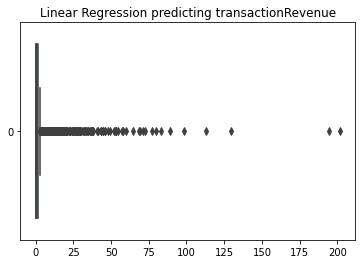

In [91]:
sns.boxplot(data = reg_predict, orient = 'h')
plt.title('Linear Regression predicting transactionRevenue')

### Plot the y_test (true values)

Text(0.5, 1.0, 'y_test transactionRevenue')

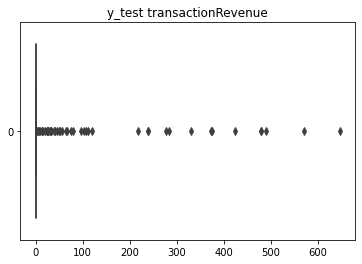

In [92]:
sns.boxplot(data = y_test, orient = 'h')
plt.title('y_test transactionRevenue')

Conclusions:
- The Model improved the predictions;
- The RMSE is lower than standard deviation;
- Looking the graphs, the model is better representing the dataset;

## 5.4 Training a gradient boosting

In [152]:
from sklearn.ensemble import GradientBoostingRegressor

# Create the model
gb = GradientBoostingRegressor()

# Training
gb.fit(X_train, y_train)

# Predicting
gb_predict = gb.predict(X_test)

# Converting negative values to 0
gb_predict[gb_predict < 0] = 0

### Evaluate the results

In [94]:
results = pd.DataFrame()

results['revenue'] = y_test
results['predict'] = gb_predict
results['error'] = gb_predict - y_test
results.head()

,revenue,predict,error
4122,0.0,0.022423,0.022423
4065,0.0,0.000000,0.000000
1731,0.0,0.000000,0.000000
4740,0.0,0.000000,0.000000
6391,0.0,0.022423,0.022423


### Analysing the errors with revenue > 0

In [95]:
results[results.revenue > 0].head()

,revenue,predict,error
3006,32.49,45.423628,12.933628
5928,74.85,0.000000,-74.850000
8361,424.50,35.721105,-388.778895
8612,55.99,21.136136,-34.853864
416,15.19,17.679543,2.489543


### Mean squared error (MSE) and root mean squared error (RMSE)

In [96]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, gb_predict)
print(f'MSE = {mse:.2f}')

rmse = np.sqrt(mse)
print(f'RMSE = {rmse:.2f}')

MSE = 549.22
RMSE = 23.44


### Analysing the mean and standard deviation

In [97]:
mean = np.mean(df_quant.transactionRevenue)
print(f'Mean = {mean:.2f}')

std = np.std(df_quant.transactionRevenue)
print(f'Standard deviation = {std:.2f}')

Mean = 1.78
Standard deviation = 25.13


### Plot the predictions

Text(0.5, 1.0, 'Gradient boosting predicting transactionRevenue')

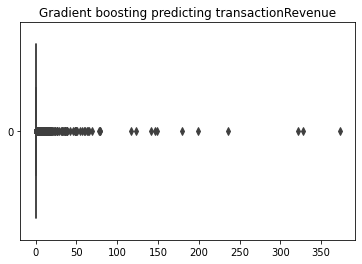

In [98]:
sns.boxplot(data = gb_predict, orient = 'h')
plt.title('Gradient boosting predicting transactionRevenue')

### Plot the y_test (true_values)

Text(0.5, 1.0, 'y_test transactionRevenue')

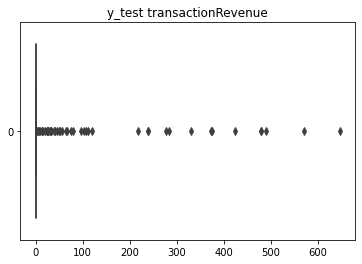

In [99]:
sns.boxplot(data = y_test, orient = 'h')
plt.title('y_test transactionRevenue')

Conclusion:
- Gradient boosting model has a slightly better performance than Linear Regression model, because the gradient boosting has a lower RMSE.

# Extra - Trying to improve the scores

https://shankarmsy.github.io/stories/gbrt-sklearn.html

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Create the model
gb = GradientBoostingRegressor()

# Training
gb.fit(X_train, y_train)

# Predicting
gb_predict = gb.predict(X_test)

# Converting negative values to 0
gb_predict[gb_predict < 0] = 0

print(f'R-squared for train {gb.score(X_train, y_train):.2f}')
print(f'R-squared for test {gb.score(X_test, y_test):.2f}')

In [172]:
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

def GradientBooster(param_grid, n_jobs, SEED=SEED):
    estimator = GradientBoostingRegressor()
    cv = ShuffleSplit(n_splits = 10, test_size = 0.2)
    classifier = GridSearchCV(estimator = estimator, cv
                              = cv, param_grid = param_grid,
                              n_jobs = n_jobs)
    classifier.fit(X_train, y_train)
    print('Best Estimator learned through GridSearch')
    print(classifier.best_estimator_)
    
    return cv, classifier.best_estimator_

In [217]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the best test and training learning curve

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,), dtype={int, float}
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv,
                                                            n_jobs = n_jobs,
                                                            train_sizes = train_sizes,
                                                            random_state = 42)
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha = 0.1,
                    color = 'r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha = 0.1,
                     color = 'g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color = 'r', label = 'Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color = 'g', 
             label = 'Cross-validation score')
    plt.legend(loc='best')
    return plt

Automatically created module for IPython interactive environment


In [203]:
param_grid={'n_estimators':[100], 
            'learning_rate': [0.1, 0.05, 0.02, 0.01],
            'max_depth':[6, 4,6],
            'min_samples_leaf':[3,5,9,17],
            'max_features':[1.0, 0.3, 0.1] 
           } 
n_jobs=4

cv, best_est = GradientBooster(param_grid, n_jobs)

Best Estimator learned through GridSearch
GradientBoostingRegressor(learning_rate=0.05, max_depth=6, max_features=0.1,
                          min_samples_leaf=17)


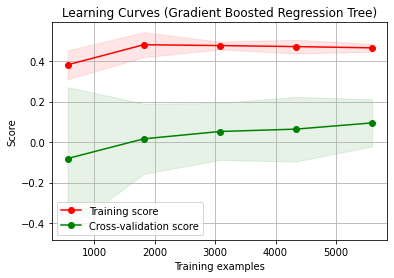

In [220]:
title = 'Learning Curves (Gradient Boosted Regression Tree)'
plot_learning_curve(estimator = best_est, title = title, X = X_train, y = y_train, cv=cv,
                    n_jobs=n_jobs)
plt.show()

In [234]:
np.random.seed(42)
train_sizes, train_scores, test_scores = learning_curve(estimator = best_est, 
                                                        X = X_train, y = y_train,
                                                        n_jobs=n_jobs, 
                                                        train_sizes=np.linspace(.1, 1.0, 5),
                                                        random_state = 42)

In [235]:
test_scores

array([[ 0.06538337,  0.06177452,  0.04161474,  0.04013234,  0.05665895],
       [ 0.10260269,  0.02700346, -0.179768  ,  0.12220805,  0.08810241],
       [ 0.14232577,  0.04473858, -0.06126898,  0.14355587,  0.08880235],
       [ 0.27192935,  0.03635252, -0.29658649,  0.10530361,  0.1301509 ],
       [ 0.24324334,  0.03654783, -0.34152008,  0.13093157,  0.10797374]])

In [236]:
train_scores

array([[0.33680776, 0.49277907, 0.49743855, 0.48851322, 0.50467496],
       [0.48845061, 0.43178442, 0.39293111, 0.39842697, 0.41772264],
       [0.47121811, 0.42720335, 0.46021922, 0.46179482, 0.47106901],
       [0.48273173, 0.469261  , 0.4900005 , 0.44432352, 0.45296305],
       [0.4613558 , 0.48600225, 0.48576782, 0.45559472, 0.48601352]])

In [63]:
mse_train = mean_squared_error(y_train, gb_predict_train)
mse_test = mean_squared_error(y_test, gb_predict)
print(f'MSE train = {mse_train:.2f}')
print(f'MSE test = {mse_test:.2f}')

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print(f'RMSE train= {rmse_train:.2f}')
print(f'RMSE test= {rmse_test:.2f}')

MSE train = 106.34
MSE test = 574.74
RMSE train= 10.31
RMSE test= 23.97


In [123]:
pd.DataFrame(gb.feature_importances_)

,0
0,0.009188
1,0.011077
2,0.011091
3,0.071255
4,0.000000
5,0.000161
6,0.000047
7,0.000000
8,0.000000
9,0.004505


In [237]:
columns_importance = pd.DataFrame(X.columns, columns=['Features'])
columns_importance['importance'] = gb.feature_importances_
columns_importance.sort_values(by = 'importance', ascending = False, inplace = True)
columns_importance

,Features,importance
42,pageviews,0.255431
49,month_last,0.182249
28,metro_last,0.115722
40,hits,0.111489
3,visitStartTime_first,0.053811
32,source_last,0.050012
43,dif_time,0.037109
29,city_last,0.024484
30,networkDomain_last,0.018363
17,date_last,0.017474
